In [1]:
import os
import pandas as pd

directory_path = r'C:\Users\jos34\OneDrive\바탕 화면\호서대학교 4학년\AI프레임워크 보안\CIC-IDS\MachineLearningCSV\MachineLearningCVE'

file_list = [file for file in os.listdir(directory_path) if file.endswith('.csv')]

dfs = []
for file in file_list:
    file_path = os.path.join(directory_path, file)
    df = pd.read_csv(file_path)
    dfs.append(df)

main_df = pd.concat(dfs, ignore_index=True)

In [2]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2830743 entries, 0 to 2830742
Data columns (total 80 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0    Destination Port             float64
 1    Flow Duration                float64
 2    Total Fwd Packets            float64
 3    Total Backward Packets       float64
 4   Total Length of Fwd Packets   float64
 5    Total Length of Bwd Packets  float64
 6    Fwd Packet Length Max        float64
 7    Fwd Packet Length Min        float64
 8    Fwd Packet Length Mean       float64
 9    Fwd Packet Length Std        float64
 10  Bwd Packet Length Max         float64
 11   Bwd Packet Length Min        float64
 12   Bwd Packet Length Mean       float64
 13   Bwd Packet Length Std        float64
 14  Flow Bytes/s                  float64
 15   Flow Packets/s               float64
 16   Flow IAT Mean                float64
 17   Flow IAT Std                 float64
 18   Flow IAT Max         

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [4]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
BENIGN                        2273097
DoS Hulk                       231073
PortScan                       158930
DDoS                           128027
DoS GoldenEye                   10293
FTP-Patator                      7938
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1966
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [5]:
main_df.drop(columns=['H'], inplace=True)
main_df.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
main_df.dropna(subset=['Flow Bytes/s'], inplace=True)

In [6]:
missing_values = main_df.isnull().sum()
missing_values = missing_values[missing_values > 0]

if len(missing_values) > 0:
    print("결측값이 있는 열:")
    for col, val in missing_values.items():
        print(f"{col}: {val}")
else:
    print("결측값이 있는 열이 없습니다.")

결측값이 있는 열이 없습니다.


In [7]:
label_counts = main_df[' Label'].value_counts()

print("Label의 분포별 정확한 수치:")
print(label_counts)


Label의 분포별 정확한 수치:
 Label
BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: count, dtype: int64


In [8]:
main_df[' Label'] = main_df[' Label'].apply(lambda x: 0 if x == 'BENIGN' else 1)

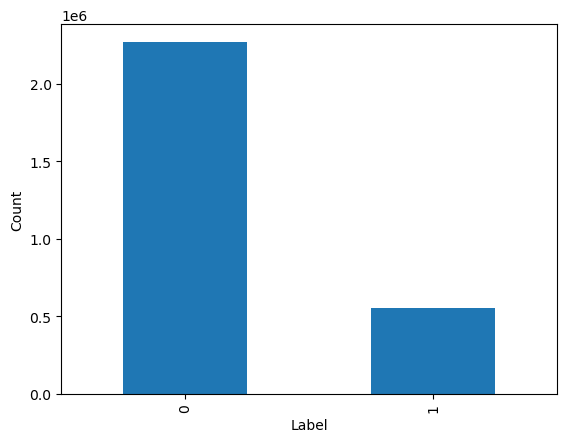

In [9]:
import matplotlib.pyplot as plt

main_df[' Label'].value_counts().plot(kind='bar')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()

In [10]:
main_df[' Label'].value_counts()

 Label
0    2271320
1     556556
Name: count, dtype: int64

In [11]:
main_df['Flow Bytes/s'] = main_df['Flow Bytes/s'].astype(float)
main_df[' Flow Packets/s'] = main_df[' Flow Packets/s'].astype(float)

In [12]:
x_data = main_df.drop([' Label'], axis=1)
y_data = main_df[' Label']

In [13]:
x_data.head(10)

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
0,54865.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,33.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,55054.0,109.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,1.100917e+05,18348.623850,109.0,0.0,109.0,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,9174.311927,9174.311927,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,55055.0,52.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,2.307692e+05,38461.538460,52.0,0.0,52.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,19230.769230,19230.769230,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,29.0,256.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,46236.0,34.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,0.00000,6.0,6.0,6.0,0.0,3.529412e+05,58823.529410,34.0,0.0,34.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,20.0,29411.764710,29411.764710,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,9.0,6.0,6.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,1.0,6.0,31.0,329.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,54863.0,3.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,4.000000e+06,666666.666700,3.0,0.0,3.0,3.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,666666.666700,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,54871.0,1022.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,1.174168e+04,1956.947162,1022.0,0.0,1022.0,1022.0,1022.0,1022.0,0.0,1022.0,1022.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,1956.947162,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,54925.0,4.0,2.0,0.0,12.0,0.0,6.0,6.0,6.0,0.00000,0.0,0.0,0.0,0.0,3.000000e+06,500000.000000,4.0,0.0,4.0,4.0,4.0,4.0,0.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,0.0,500000.000000,0.000000,6.0,6.0,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9.0,6.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,12.0,0.0,0.0,32.0,-1.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,54925.0

In [14]:
y_data.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name:  Label, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

x_train_50, x_test_50, y_train_50, y_test_50 = train_test_split(x_data, y_data, test_size=0.5, random_state=42)
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(x_data, y_data, test_size=0.4, random_state=42)
x_train_70, x_test_70, y_train_70, y_test_70 = train_test_split(x_data, y_data, test_size=0.3, random_state=42)
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(x_data, y_data, test_size=0.2, random_state=42)
x_train_90, x_test_90, y_train_90, y_test_90 = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

Data Split: 50%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:17:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9992114222830139


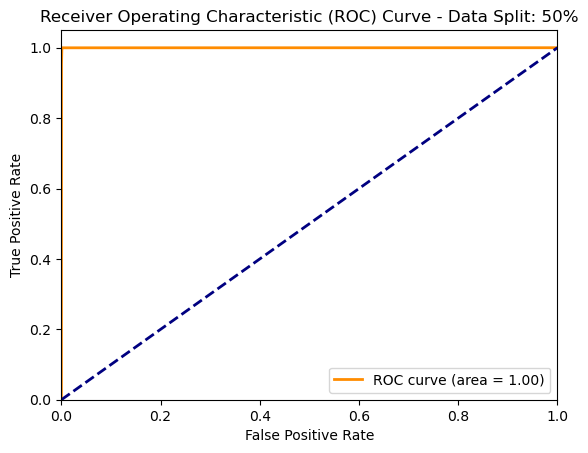

Data Split: 60%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9992220313645128


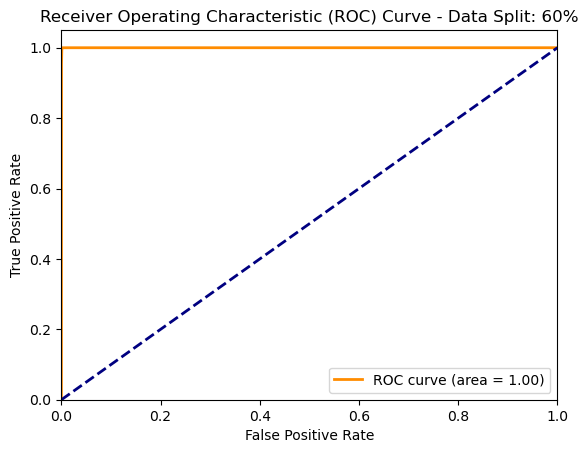

Data Split: 70%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:18:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9992267460980736


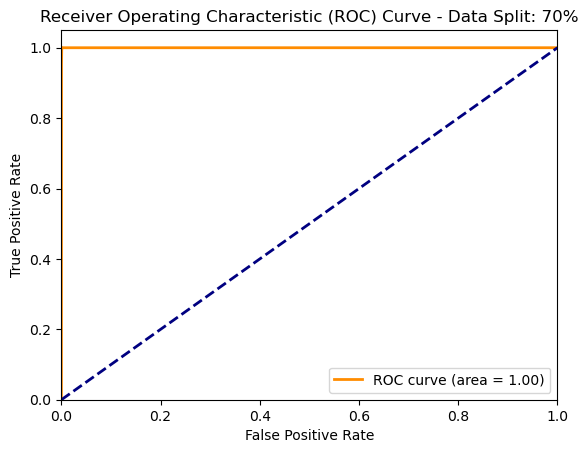

Data Split: 80%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9992308725971399


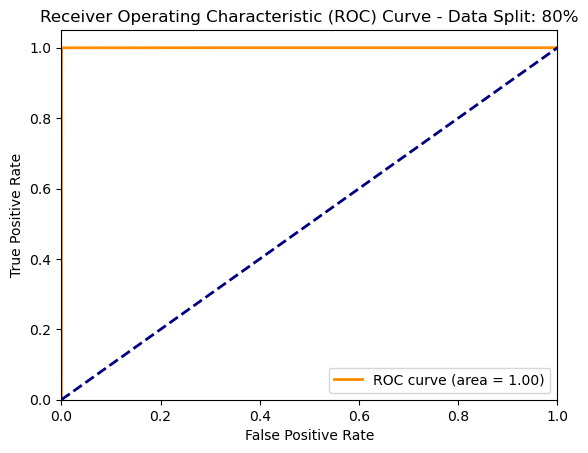

Data Split: 90%


C:\Users\jos34\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [20:19:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0750514818a16474a-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "bagging_fraction", "bagging_freq", "feature_fraction", "num_leaves" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost 정확도 : 0.9992680028855538


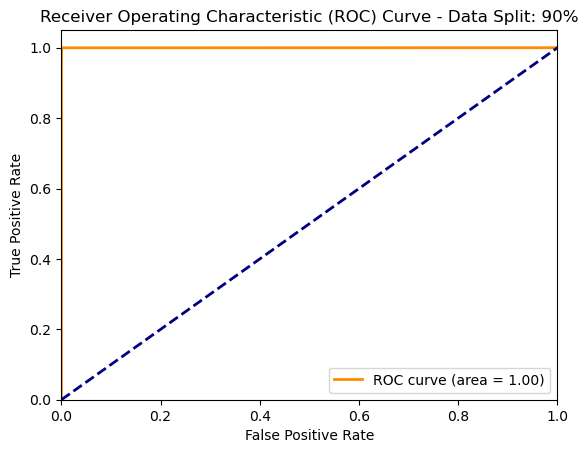

In [18]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

params = {
    'booster': 'gbtree',
    'learning_rate': 0.05,
    'max_depth': 12,
    'num_leaves': 63,
    'bagging_freq': 32,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'objective': 'binary:logistic',
    'num_class': 1,
    'eval_metric': 'merror'
}

datasets = {
    "50%": (x_train_50, x_test_50, y_train_50, y_test_50),
    "60%": (x_train_60, x_test_60, y_train_60, y_test_60),
    "70%": (x_train_70, x_test_70, y_train_70, y_test_70),
    "80%": (x_train_80, x_test_80, y_train_80, y_test_80),
    "90%": (x_train_90, x_test_90, y_train_90, y_test_90)
}

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    

    model = xgb.XGBClassifier(**params)
    model.fit(x_train, y_train)

    
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f'XGBoost 정확도 : {accuracy}')


    y_pred_proba = model.predict_proba(x_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Data Split: {name}')
    plt.legend(loc="lower right")
    plt.show()


Data Split: 50%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 : 0.8621601512937626
              precision    recall  f1-score   support

           0       0.90      0.93      0.92   1135313
           1       0.67      0.60      0.63    278625

    accuracy                           0.86   1413938
   macro avg       0.79      0.76      0.77   1413938
weighted avg       0.86      0.86      0.86   1413938



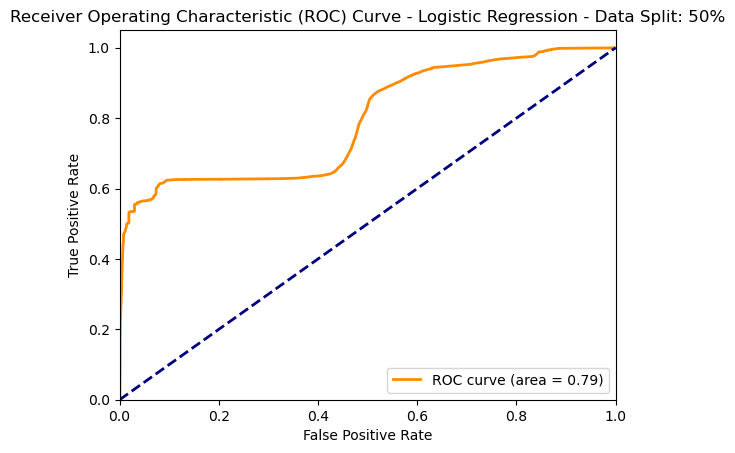

Data Split: 60%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 : 0.8531990865940975
              precision    recall  f1-score   support

           0       0.90      0.91      0.91    907946
           1       0.63      0.60      0.62    223205

    accuracy                           0.85   1131151
   macro avg       0.77      0.76      0.76   1131151
weighted avg       0.85      0.85      0.85   1131151



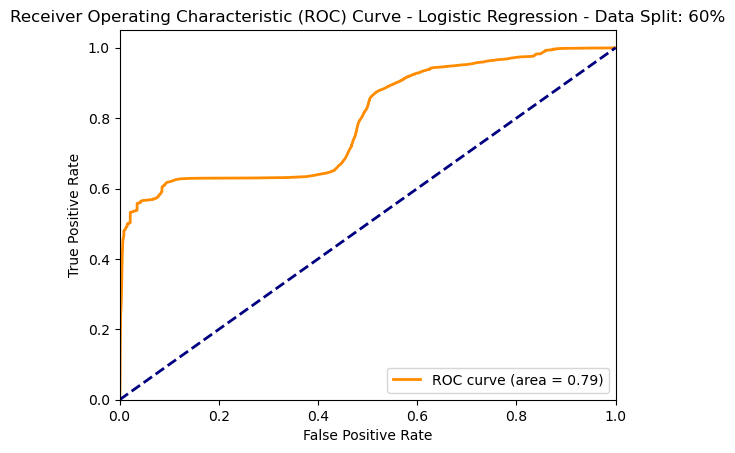

Data Split: 70%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 : 0.8558388331410022
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    681014
           1       0.65      0.59      0.62    167349

    accuracy                           0.86    848363
   macro avg       0.77      0.76      0.76    848363
weighted avg       0.85      0.86      0.85    848363



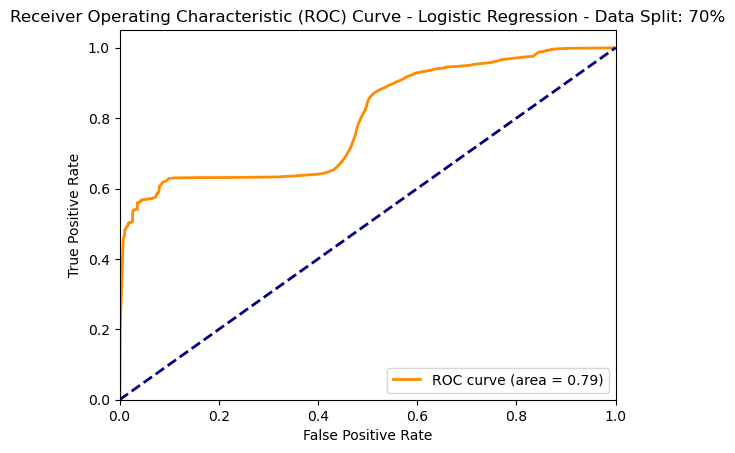

Data Split: 80%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 : 0.8573171421701062
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    454089
           1       0.65      0.60      0.63    111487

    accuracy                           0.86    565576
   macro avg       0.78      0.76      0.77    565576
weighted avg       0.85      0.86      0.86    565576



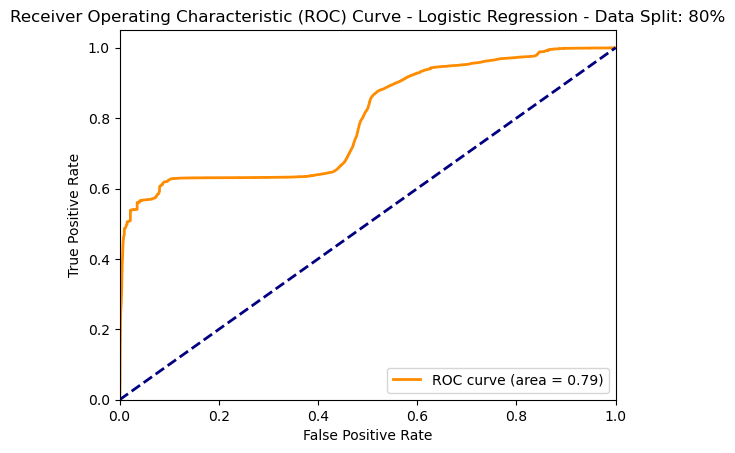

Data Split: 90%


C:\Users\jos34\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


로지스틱 회귀 정확도 : 0.8553227152495863
              precision    recall  f1-score   support

           0       0.90      0.92      0.91    226936
           1       0.65      0.59      0.62     55852

    accuracy                           0.86    282788
   macro avg       0.77      0.76      0.76    282788
weighted avg       0.85      0.86      0.85    282788



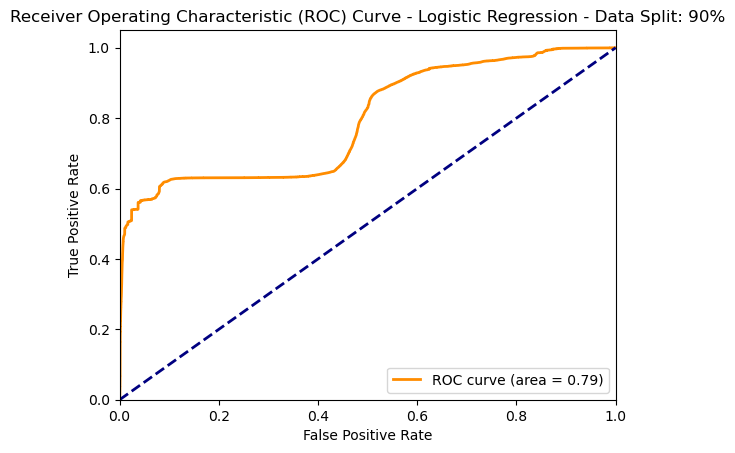

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    
    
    log_reg_model = LogisticRegression()
    
    
    log_reg_model.fit(x_train, y_train)
    
    
    y_pred_log_reg = log_reg_model.predict(x_test)
    
    
    accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
    print(f'로지스틱 회귀 정확도 : {accuracy_log_reg}')
    
    
    report_log_reg = classification_report(y_test, y_pred_log_reg)
    print(report_log_reg)
    
    
    y_pred_proba_log_reg = log_reg_model.predict_proba(x_test)[:, 1]
    fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg)
    roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)
    
    
    plt.figure()
    plt.plot(fpr_log_reg, tpr_log_reg, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_log_reg)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Logistic Regression - Data Split: {name}')
    plt.legend(loc="lower right")
    plt.show()

Data Split: 50%
랜덤 포레스트 정확도 : 0.9987927334861925
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1135313
           1       1.00      1.00      1.00    278625

    accuracy                           1.00   1413938
   macro avg       1.00      1.00      1.00   1413938
weighted avg       1.00      1.00      1.00   1413938



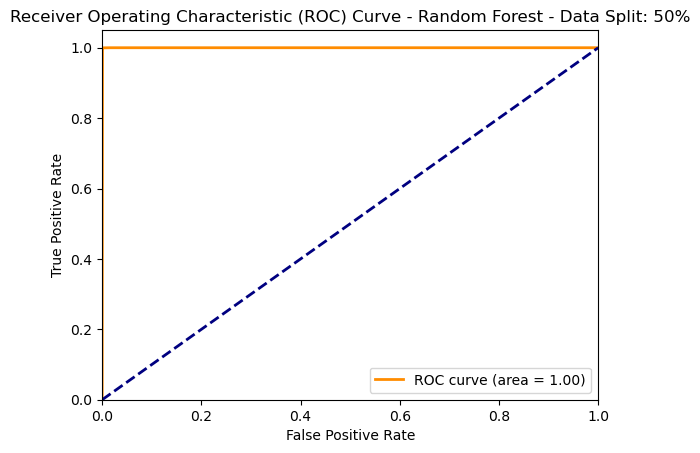

Data Split: 60%
랜덤 포레스트 정확도 : 0.9988295108256988
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907946
           1       1.00      1.00      1.00    223205

    accuracy                           1.00   1131151
   macro avg       1.00      1.00      1.00   1131151
weighted avg       1.00      1.00      1.00   1131151



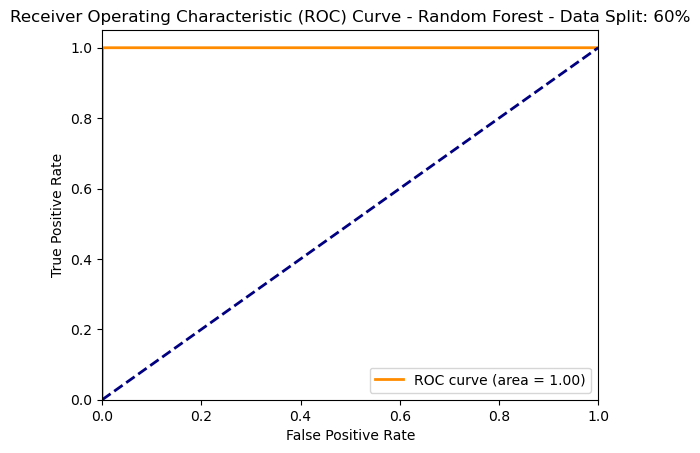

Data Split: 70%
랜덤 포레스트 정확도 : 0.9988424766285187
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681014
           1       1.00      1.00      1.00    167349

    accuracy                           1.00    848363
   macro avg       1.00      1.00      1.00    848363
weighted avg       1.00      1.00      1.00    848363



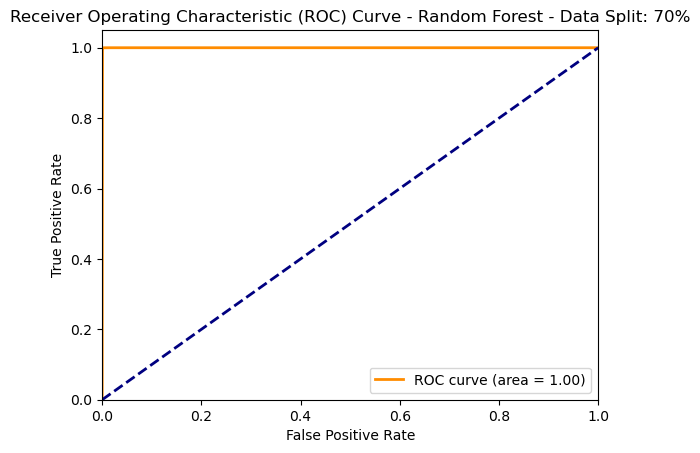

Data Split: 80%
랜덤 포레스트 정확도 : 0.9988507291681401
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454089
           1       1.00      1.00      1.00    111487

    accuracy                           1.00    565576
   macro avg       1.00      1.00      1.00    565576
weighted avg       1.00      1.00      1.00    565576



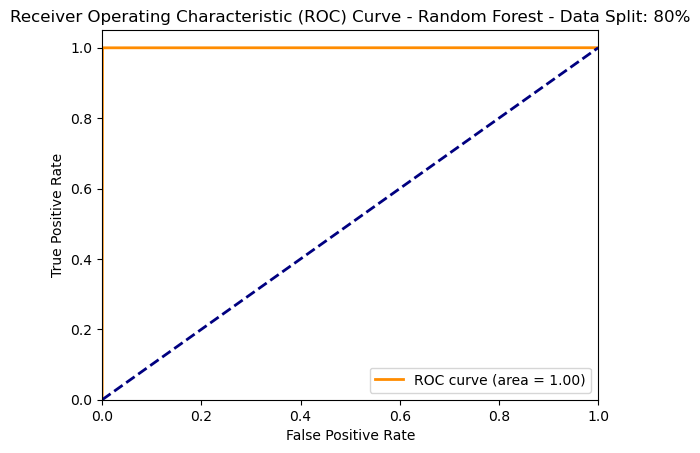

Data Split: 90%
랜덤 포레스트 정확도 : 0.998907308655247
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226936
           1       1.00      1.00      1.00     55852

    accuracy                           1.00    282788
   macro avg       1.00      1.00      1.00    282788
weighted avg       1.00      1.00      1.00    282788



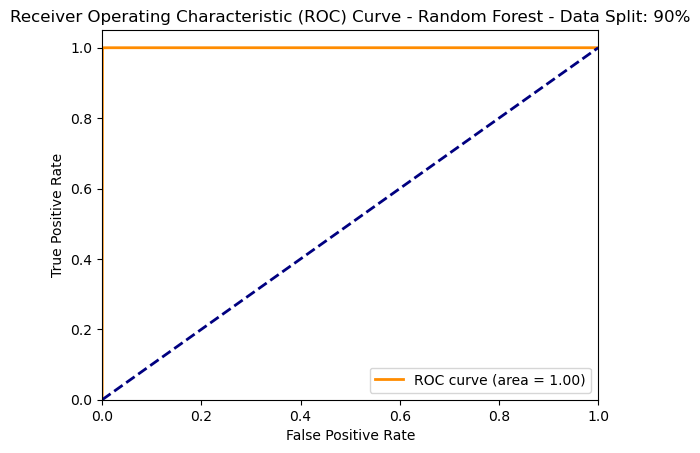

In [21]:
from sklearn.ensemble import RandomForestClassifier

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    
    
    rf_model = RandomForestClassifier(n_estimators=100)
    
    
    rf_model.fit(x_train, y_train)
    
    
    y_pred_rf = rf_model.predict(x_test)
    
    
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    print(f'랜덤 포레스트 정확도 : {accuracy_rf}')
    
    
    report_rf = classification_report(y_test, y_pred_rf)
    print(report_rf)
    
    
    y_pred_proba_rf = rf_model.predict_proba(x_test)[:, 1]
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_proba_rf)
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    
    
    plt.figure()
    plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_rf)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Random Forest - Data Split: {name}')
    plt.legend(loc="lower right")
    plt.show()

Data Split: 50%
그래디언트 부스팅 정확도 : 0.9961865371748974
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1135313
           1       0.99      0.99      0.99    278625

    accuracy                           1.00   1413938
   macro avg       0.99      0.99      0.99   1413938
weighted avg       1.00      1.00      1.00   1413938



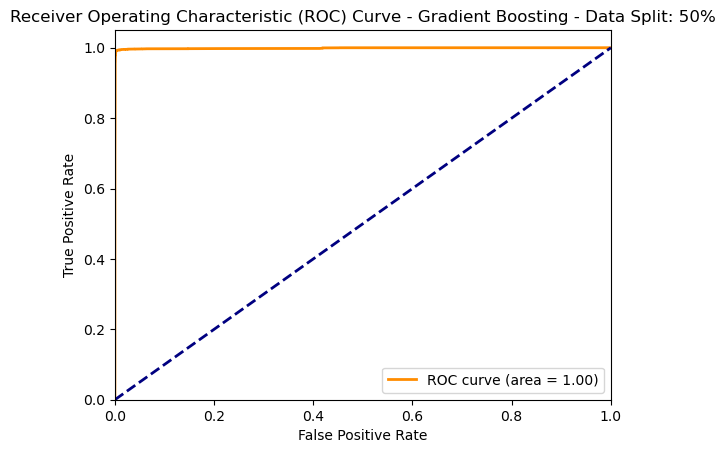

Data Split: 60%
그래디언트 부스팅 정확도 : 0.9966273291541095
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    907946
           1       0.99      0.99      0.99    223205

    accuracy                           1.00   1131151
   macro avg       0.99      0.99      0.99   1131151
weighted avg       1.00      1.00      1.00   1131151



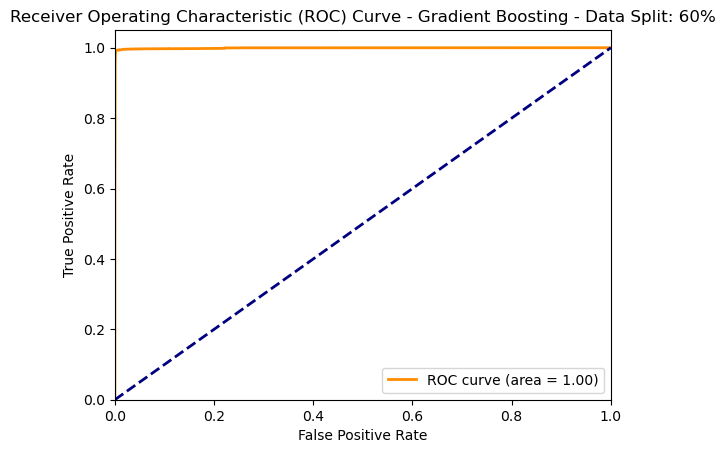

Data Split: 70%
그래디언트 부스팅 정확도 : 0.9967667142484997
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    681014
           1       0.99      0.99      0.99    167349

    accuracy                           1.00    848363
   macro avg       1.00      0.99      0.99    848363
weighted avg       1.00      1.00      1.00    848363



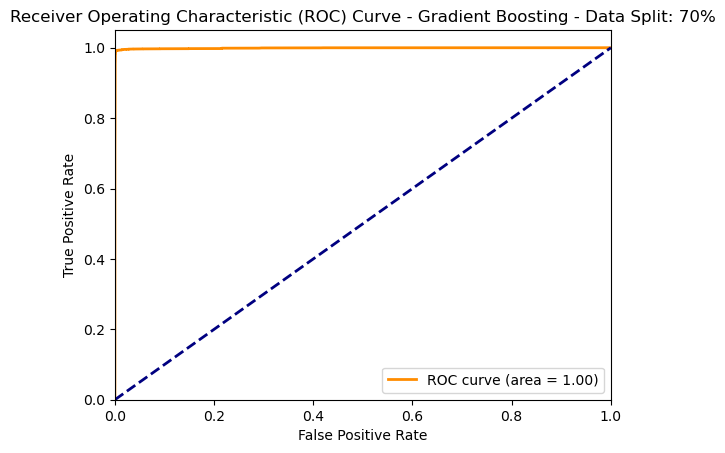

Data Split: 80%
그래디언트 부스팅 정확도 : 0.996431956094318
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    454089
           1       0.99      0.99      0.99    111487

    accuracy                           1.00    565576
   macro avg       0.99      0.99      0.99    565576
weighted avg       1.00      1.00      1.00    565576



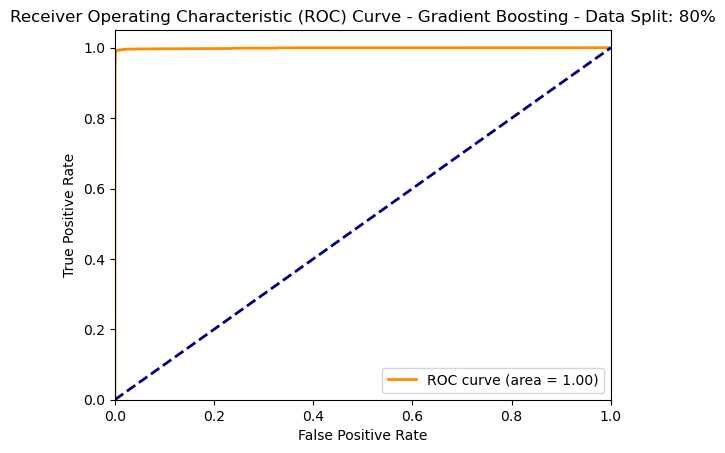

Data Split: 90%
그래디언트 부스팅 정확도 : 0.9964496371840389
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226936
           1       0.99      0.99      0.99     55852

    accuracy                           1.00    282788
   macro avg       0.99      0.99      0.99    282788
weighted avg       1.00      1.00      1.00    282788



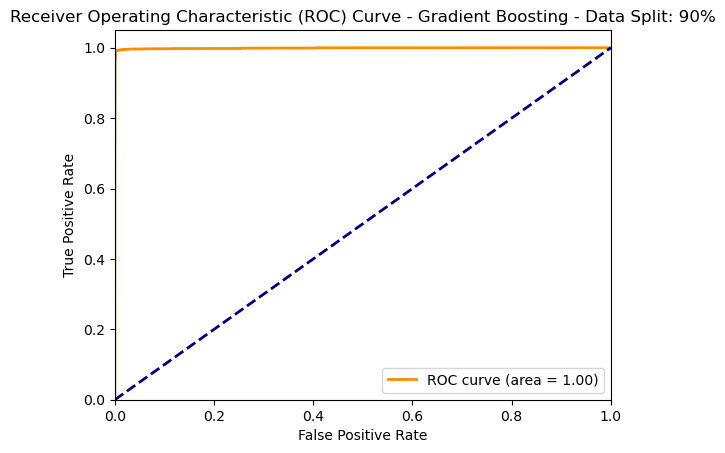

In [21]:
from sklearn.ensemble import GradientBoostingClassifier

for name, (x_train, x_test, y_train, y_test) in datasets.items():
    print(f"Data Split: {name}")
    
    
    gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
    
    
    gb_model.fit(x_train, y_train)
    
    
    y_pred_gb = gb_model.predict(x_test)
    
    
    accuracy_gb = accuracy_score(y_test, y_pred_gb)
    print(f'그래디언트 부스팅 정확도 : {accuracy_gb}')
    
    
    report_gb = classification_report(y_test, y_pred_gb)
    print(report_gb)
    
    
    y_pred_proba_gb = gb_model.predict_proba(x_test)[:, 1]
    fpr_gb, tpr_gb, thresholds_gb = roc_curve(y_test, y_pred_proba_gb)
    roc_auc_gb = auc(fpr_gb, tpr_gb)
    
    
    plt.figure()
    plt.plot(fpr_gb, tpr_gb, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_gb)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - Gradient Boosting - Data Split: {name}')
    plt.legend(loc="lower right")
    plt.show()